In [2]:
print("Hello,world!")

Hello,world!


In [9]:
import requests
import json
import os
import base64
from Crypto.Cipher import AES
from pprint import pprint
def aesEncrypt(text, secKey):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(secKey, 2, '0102030405060708')
    ciphertext = encryptor.encrypt(text)
    ciphertext = base64.b64encode(ciphertext)
    return ciphertext


def rsaEncrypt(text, pubKey, modulus):
    text = text[::-1]
    rs = int(text.encode('hex'), 16)**int(pubKey, 16) % int(modulus, 16)
    return format(rs, 'x').zfill(256)


def createSecretKey(size):
    return (''.join(map(lambda xx: (hex(ord(xx))[2:]), os.urandom(size))))[0:16]


url = 'http://music.163.com/weapi/v1/resource/comments/R_SO_4_30953009/?csrf_token='
headers = {
    'Cookie': 'appver=1.5.0.75771;',
    'Referer': 'http://music.163.com/'
}
text = {
    'username': '邮箱',
    'password': '密码',
    'rememberLogin': 'true'
}
modulus = '00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7'
nonce = '0CoJUm6Qyw8W8jud'
pubKey = '010001'
text = json.dumps(text)
secKey = createSecretKey(16)
encText = aesEncrypt(aesEncrypt(text, nonce), secKey)
encSecKey = rsaEncrypt(secKey, pubKey, modulus)
data = {
    'params': encText,
    'encSecKey': encSecKey
}

req = requests.post(url, headers=headers, data=data)
pprint(req.json())
for content in req.json()['comments']:
    print (content['content'].encode('utf-8'))
print (req.json()['total'])


TypeError: ord() expected string of length 1, but int found

In [8]:
a=100
print(a)

100


In [7]:
print "hello,world"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("hello,world")? (<ipython-input-7-4fea1ae9cd97>, line 1)

In [ ]:
#coding = utf-8
from Crypto.Cipher import AES
import base64
import requests
import json


old_offset="0";
first_param = "{rid:\"\", offset:\"0\", total:\"true\", limit:\"10\", csrf_token:\"\"}"
second_param = "010001"
third_param = "00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7"

forth_param = "0CoJUm6Qyw8W8jud"

def get_params():
    iv = "0102030405060708"
    first_key = forth_param
    second_key = 16 * 'F'
    h_encText = AES_encrypt(first_param, first_key, iv)
    h_encText = AES_encrypt(h_encText, second_key, iv)
    return h_encText


def get_encSecKey():
    encSecKey = "257348aecb5e556c066de214e531faadd1c55d814f9be95fd06d6bff9f4c7a41f831f6394d5a3fd2e3881736d94a02ca919d952872e7d0a50ebfa1769a7a62d512f5f1ca21aec60bc3819a9c3ffca5eca9a0dba6d6f7249b06f5965ecfff3695b54e1c28f3f624750ed39e7de08fc8493242e26dbc4484a01c76f739e135637c"
    return encSecKey

def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text)
    encrypt_text = base64.b64encode(encrypt_text)
    encrypt_text = str(encrypt_text, encoding="utf-8")
    return encrypt_text


def get_json(url, params, encSecKey):
    data = {
         "params": params,
         "encSecKey": encSecKey
    }
    headers={
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
        'Cookie': 'appver=1.5.0.75771;',
        'Referer': 'http://music.163.com/'
    }
    response = requests.post(url, headers=headers, data=data)
    return response.content

if __name__ == "__main__":
    song_id=input("输入歌曲ID：")
    url = 'http://music.163.com/weapi/v1/resource/comments/R_SO_4_30635613/?csrf_token='
    for i in range (1,10):
        print("In ",i," round")
        params = get_params()
        encSecKey = get_encSecKey()
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
        #print (json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False))
        for item in json_dict['comments']:
            #print(item['user']['nickname'])
            print(item['user']['nickname'],':',item['content'])
        print(old_offset)
        first_param.replace(old_offset,str((i+1)*10));
        old_offset=str((i+1)*10)

In [26]:
30635613


30635613

http://music.163.com/weapi/v1/resource/comments/R_VI_62_C3C7FC6B55DE1F87051C88668F7196DD/?csrf_token=
https://music.163.com/weapi/comment/commentthread/info?csrf_token=
O5/yxckUkfK03FP34r7bgEUt9Rsc/jnUB14GDqW0sT8ntUZaFY3qzIhvs38kxiuQ8Vqp+4wfOilfoAiaAM62qNG4aEcWPT30EUsqLhsM4Rez8AM2qQWFai28nsyyKmGP
{'msg': '参数错误', 'code': 400}
In  1  round
O5/yxckUkfK03FP34r7bgEUt9Rsc/jnUB14GDqW0sT8ntUZaFY3qzIhvs38kxiuQ8Vqp+4wfOilfoAiaAM62qNG4aEcWPT30EUsqLhsM4Rez8AM2qQWFai28nsyyKmGP
尸尸尸xxx : 身材！！！嫉妒使我丑陋
寒商卿 : 姑娘真的瘦到让我不想说话。。。[流泪]羡慕ing
caomaohou : 我国有一套完整的刑法
九夏菇凉 : 现在刷网易视频有种逛b站的感觉 哈哈哈哈哈哈
九夏菇凉 : 小姐姐可爱！
COYULILI : 最后，后面有个大妈摇摇晃晃的走着
迪减奥特曼曼 : 细思甚恐
北山亦阳 : 这背景相当不错ლ(╹◡╹ლ)
玺欢易辈子 : 我们学校就有学妹们在跳🙃
abdihnimkh : ئانام
{rid:"", offset:"0", total:"false", limit:"10", csrf_token:""}
0
In  2  round
O5/yxckUkfK03FP34r7bgIIPxktpnEwHppYnPD7fD2dsxm11189ZFZEylOrU/Pro1Rd9h2tHqMq9n42SZnDrqZBG+3AjVmJSxI2J3FfShuctVUeRJnxEp+oYjU2dwbrA
瑜谨 : 扇子用的好棒qwq
宁怀薰草 : 尬舞嘛
一根-蘆葦 : 😂😂
黑零_ : ky直接举报，大家一起吧
EMT-亡歌 : 细细想了一下好恐怖。。
阿九不是久y : 哈哈[可爱]
只听日推的我--

炒鸡炒鸡酷的小朋友 : 这几天你总是围着我嘤嘤嘤
我好奇的问你在干什么
他说“我在调戏大妈”
真好呀 我是你的仙女
你的饲主只有我（逃）(⌒▽⌒)
西泠儿er_ : 小姐姐我爱上你了
花前月下的舞步 : 大妈实力抢镜
竹浪飞桦hl : 我有一个大胆的想法，小姐姐缺男朋友吧，可以找我
申小萱的古月琴事 : 好听的歌～也欢迎来我主页听二胡版《寄明月》[奸笑]
Chika知夏 : 伢伢敲好看！！！\(//∇//)\
Fragmented-dream : 有腿真好[皱眉]
初晴ZJL : 她怎么可以这么可爱！她的腿怎么可以这么好看！怎么可以！么可以！可以！以！
Frymor : 厉害，跳的好看
HIMEIMAN : 觉得小姐姐不适合这个发型，但是舞还是美啊！
{rid:"", offset:"180", total:"false", limit:"10", csrf_token:""}
180


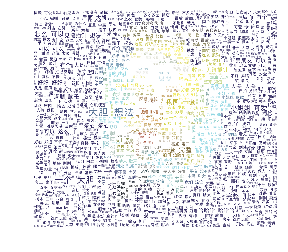

In [11]:
#coding = utf-8
from Crypto.Cipher import AES
import base64
import requests
import json
from wordcloud import WordCloud,ImageColorGenerator 
import jieba        #分词库
import imageio
import numpy as np    #科学数学计算包
import matplotlib.pyplot as plt   #数学绘图库
from PIL import Image






old_offset="0"
first_param = "{rid:\"\", offset:\"0\", total:\"false\", limit:\"10\", csrf_token:\"\"}"
second_param = "010001"
third_param = "00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7"
forth_param = "0CoJUm6Qyw8W8jud"

user_info="http://music.163.com/#/user/home?id="

filename='/Users/limuyle/Desktop/comment_video.txt'

# def convert(content):
#     typeEncode=sys.getfilesystemencoding()
#     infoEncode=chardet.detect(content).get('encoding','utf-8')
#     return content.decode(infoEncode,'ignore').encode('utf-8')

def get_params():
    iv = "0102030405060708"
    first_key = forth_param
    second_key = 16 * 'F'
    h_encText = AES_encrypt(first_param, first_key, iv)
    h_encText = AES_encrypt(h_encText, second_key, iv)
    return h_encText


def get_encSecKey():
    encSecKey = "257348aecb5e556c066de214e531faadd1c55d814f9be95fd06d6bff9f4c7a41f831f6394d5a3fd2e3881736d94a02ca919d952872e7d0a50ebfa1769a7a62d512f5f1ca21aec60bc3819a9c3ffca5eca9a0dba6d6f7249b06f5965ecfff3695b54e1c28f3f624750ed39e7de08fc8493242e26dbc4484a01c76f739e135637c"
    return encSecKey

def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text)
    encrypt_text = base64.b64encode(encrypt_text)
    encrypt_text = str(encrypt_text, encoding="utf-8")
    return encrypt_text


def get_json(url, params, encSecKey):
    data = {
         "params": params,
         "encSecKey": encSecKey
    }
    headers={
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
        'Cookie': 'appver=1.5.0.75771;',
        'Referer': 'http://music.163.com/'
    }
    response = requests.post(url, headers=headers, data=data)
    return response.content


# def get_html(url):
#     headers={
#         'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
#         'Cookie': 'appver=1.5.0.75771;',
#         'Referer': 'http://music.163.com/'
#     }
#     response=requests.post(url,headers=headers)
#     if response.status_code==200:
#         return response.text
#     return None

def get_dict(json_str):
    json_dict=json.loads(json_str)
    return json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False)

def get_rounds(times,url):
    global first_param,old_offset
  
    for i in range (1,times):
        print("In ",i," round")
        params = get_params()
        print(params)
        encSecKey = get_encSecKey()
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
            #         print (json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False))
        for item in json_dict['comments']:
            print(item['user']['nickname'],':',item['content'])
            with open(filename,'a',encoding='utf-8') as file:
            #                 file.write(' '.join([item['user']['nickname'],':',item['content']]))
                file.write(item['content'])
            #                 file.write('\n'+'='*50+'\n')
        print(first_param)
        print(old_offset)
        first_param=first_param.replace(old_offset,str(i*10),1)
      
        old_offset=str(i*10)

def get_playInfo(url_playInfo):
    params = get_params()
    print(url_playInfo)
    print(params)
    encSecKey = get_encSecKey()
    json_text = get_json(url_playInfo, params,encSecKey)
    json_dict = json.loads(json_text)
    print(json_dict)
#     return json_dict['commentCount']
    


def get_wordcloud(filename):
    with open(filename) as f:
        mytxt=f.read()
        cut_txt=jieba.cut(mytxt,cut_all=False)
        result="/".join(cut_txt)
        image=Image.open(r'/Users/limuyle/Desktop/timg.jpg')
        graph=np.array(image)

        cloud=WordCloud(font_path='/Users/limuyle/Downloads/simhei.ttf',background_color='white',mask=graph,max_font_size=40,max_words=2000)
        wordcloud=cloud.generate(result)
        image_color=ImageColorGenerator(graph)
        wordcloud.recolor(color_func=image_color)

        wordcloud.to_file('/Users/limuyle/Desktop/wordcloud_video.jpg')
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()


        
        

if __name__ == "__main__":
    video_id="C3C7FC6B55DE1F87051C88668F7196DD"
    
    url = 'http://music.163.com/weapi/v1/resource/comments/R_VI_62_'+video_id+'/?csrf_token='
    print(url)
    url_playInfo = 'https://music.163.com/weapi/comment/commentthread/info?csrf_token='
    get_playInfo(url_playInfo)
    #print(page)
    
    get_rounds(20,url)   
    get_wordcloud(filename)
    
        

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<meta name="baidu-site-verification" content="cNhJHKEzsD" />
<meta property="qc:admins" content="27354635321361636375" />
<link rel="canonical" href="https://music.163.com/">
<meta name="applicable-device" content="pc,mobile">
<title>网易云音乐</title>
<meta name="keywords" content="网易云音乐，音乐，播放器，网易，下载，播放，DJ，免费，明星，精选，歌单，识别音乐，收藏，分享音乐，音乐互动，高音质，320K，音乐社交，官网，music.163.com" />
<meta name="description" content="网易云音乐是一款专注于发现与分享的音乐产品，依托专业音乐人、DJ、好友推荐及社交功能，为用户打造全新的音乐生活。" />
<meta property="og:title" content="网易云音乐" />
<meta property="og:type" content="website" />
<meta property="og:image" content="http://p3.music.126.net/tBTNafgjNnTL1KlZMt7lVA==/18885211718935735.jpg" />
<meta property="og:url" content="https://music.163.com/" />
<script type="text/javascript">
var GDownloadLink="";
var GDevice = "phone";
var GFrom="";
var GClient="";
var GPlatform="other";
var GRef = '';
var GInApp = false;
var GMobile = false;
var GAbroad = false;
var GUser={};
v

带入法 : 这个世界上，从来就没有最好的，只有最合适的。比如蓝天和白云，绿草和大地，比如我遇到你，以及，你遇到我。
——夏葳《一蓑烟雨任平生》
上仙uuu : 坐在车上，车速开到五十迈，吹着呼和浩特微热的风，看着多年的变化，耳机忽然传来这首歌，让我想起他，他还好吗
花生酱与抹茶蛋糕 : 我想有一天能弹吉他给他听
居一酥 : 我想回家。不想上学。
嘿丶ys : 高中那会，我暗恋着一个女孩子，那天她在折纸鹤，我说“这是要送给谁啊”，她看着我说“送给我最喜欢的人”。那年毕业，她送给我一只熊公仔。后来我结婚了有了孩子，有一天孩子调皮用刀割开了那熊，里面装着许许多多的纸鹤，当时我哭了，如果上天再给我一次重来的机会
其实上面都是我编的。我是单身狗
橋老西bleuchilin : 本以为会沉浸在悲伤中 但怎奈旋律宛转反复 似乎又给人一丝希冀 似乎郎骑竹马来的感情本就该是美好的 稚嫩如春 化作秋酿 甘醇的令人陶醉
风风火火呀 : 看运气了[吐舌]
没有小猪的的的的佩奇 : 你将来结婚了，一定要告诉我，我不会去抢婚或者砸场子，我会摸摸新娘的婚纱在她耳边轻轻的说 :“这是我十七岁是的梦想”
古城旧巷老男孩 : 不是因为喜欢房东的猫才喜欢秋酿，而是因为喜欢秋酿才喜欢房东的猫。就像不是因为抽烟时候才想你，而是因为想你的时候才抽烟，知道自己有瘾，可就是戒不掉。那年你也是十八岁........
bLUeMOuNtAiNN : 表白红鼻子小黑（*/∇＼*）
{rid:"", offset:"10", total:"false", limit:"10", csrf_token:""}
10
In  3  round
surgei : 一首歌，一个人，一件旗袍，一把吉他，一些回忆，愿我们各自安好
潇洒美少年 : 以后再也不去音乐主题餐厅了。昨天晚上在洛阳，和几个朋友一起去了一家音乐主题餐厅吃个饭喝点小啤酒，凌晨两点，一首熟悉的歌慢慢入耳，对 没错 是王北车的陷阱，突然让我想起了你，整个人好像掉了陷阱一样，无法自拔。今天早上从睡梦中醒来，回想着梦里的你，😔你早已消失无踪。
苏锦言呐 : 我会陌陌她的婚纱 告诉她  这是我曾经的梦想
识好歹1712 : 我喜欢你是最纯粹的喜欢
曲词丶 : 45和闭眼  或许闭眼更好。
你的说唱男友- : 最难受的是她什么时候把你删除的你都不知道
你的说唱男友- : 哈哈

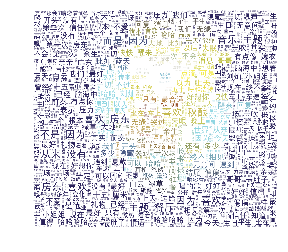

In [18]:
#coding = utf-8
from Crypto.Cipher import AES
import base64
import requests
import json
from wordcloud import WordCloud,ImageColorGenerator 
import jieba        #分词库
import imageio
import numpy as np    #科学数学计算包
import matplotlib.pyplot as plt   #数学绘图库
from PIL import Image
import re


old_offset="0"
first_param = "{rid:\"\", offset:\"0\", total:\"false\", limit:\"10\", csrf_token:\"\"}"
second_param = "010001"
third_param = "00e0b509f6259df8642dbc35662901477df22677ec152b5ff68ace615bb7b725152b3ab17a876aea8a5aa76d2e417629ec4ee341f56135fccf695280104e0312ecbda92557c93870114af6c9d05c4f7f0c3685b7a46bee255932575cce10b424d813cfe4875d3e82047b97ddef52741d546b8e289dc6935b3ece0462db0a22b8e7"
forth_param = "0CoJUm6Qyw8W8jud"
filename='/Users/limuyle/Desktop/comments.txt'


def get_params():
    iv = "0102030405060708"
    first_key = forth_param
    second_key = 16 * 'F'
    h_encText = AES_encrypt(first_param, first_key, iv)
    h_encText = AES_encrypt(h_encText, second_key, iv)
    return h_encText


def get_encSecKey():
    encSecKey = "257348aecb5e556c066de214e531faadd1c55d814f9be95fd06d6bff9f4c7a41f831f6394d5a3fd2e3881736d94a02ca919d952872e7d0a50ebfa1769a7a62d512f5f1ca21aec60bc3819a9c3ffca5eca9a0dba6d6f7249b06f5965ecfff3695b54e1c28f3f624750ed39e7de08fc8493242e26dbc4484a01c76f739e135637c"
    return encSecKey

def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text)
    encrypt_text = base64.b64encode(encrypt_text)
    encrypt_text = str(encrypt_text, encoding="utf-8")
    return encrypt_text


def get_json(url, params, encSecKey):
    data = {
         "params": params,
         "encSecKey": encSecKey
    }
    headers={
        'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
        'Cookie': 'appver=1.5.0.75771;',
        'Referer': 'http://music.163.com/'
    }
    response = requests.post(url, headers=headers, data=data)
    return response.content

def get_rounds(times):
    global first_param,old_offset
    print(url)
  
    for i in range (1,times):
        print("In ",i," round")
        params = get_params()
        encSecKey = get_encSecKey()
        json_text = get_json(url, params, encSecKey)
        json_dict = json.loads(json_text)
            #         print (json.dumps(json_dict,sort_keys=True,indent=4,separators=(',',':'),ensure_ascii=False))
        for item in json_dict['comments']:
            print(item['user']['nickname'],':',item['content'])
            with open(filename,'a',encoding='utf-8') as file:
            #                 file.write(' '.join([item['user']['nickname'],':',item['content']]))
                file.write(item['content'])
            #                 file.write('\n'+'='*50+'\n')
        print(first_param)
        print(old_offset)
        first_param=first_param.replace(old_offset,str(i*10),1)
      
        old_offset=str(i*10)
                    
                    
    

def get_wordcloud(filename):
    with open(filename) as f:
        mytxt=f.read()
        cut_txt=jieba.cut(mytxt,cut_all=False)
        result="/".join(cut_txt)
        image=Image.open(r'/Users/limuyle/Desktop/timg.jpg')
        graph=np.array(image)

        cloud=WordCloud(font_path='/Users/limuyle/Downloads/simhei.ttf',background_color='white',mask=graph,max_font_size=40,max_words=2000)
        wordcloud=cloud.generate(result)
        image_color=ImageColorGenerator(graph)
        wordcloud.recolor(color_func=image_color)

        wordcloud.to_file('/Users/limuyle/Desktop/wordcloud.jpg')
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        


if __name__ == "__main__":
#     song_id=input("输入歌曲ID：")
    url = 'http://music.163.com/weapi/v1/resource/comments/R_SO_4_30635613/?csrf_token='
    
    html=requests.get('https://music.163.com/#/song?id=30635613')
    pattern=re.compile('<span>.*?id="cnt_comment_count">(.*?)</span>',re.S)
    print(html.text)
    items=re.findall(pattern,html.text)
    print(items)

    get_rounds(10)   
    get_wordcloud(filename)
    
       
      
       
        




In [13]:
123


123

In [2]:
from wordcloud import WordCloud,ImageColorGenerator 
import jieba        #分词库
import imageio
import numpy as np    #科学数学计算包
import matplotlib.pyplot as plt   #数学绘图库
from PIL import Image

# color_mask=imageio.imread('/Users/limuyle/Desktop/timg.jpg')
def get_wordcloud(filename):
    with open(filename) as f:
        mytxt=f.read()
        cut_txt=jieba.cut(mytxt,cut_all=False)
        result="/".join(cut_txt)
        image=Image.open(r'/Users/limuyle/Desktop/timg.jpg')
        graph=np.array(image)

        cloud=WordCloud(font_path='/Users/limuyle/Downloads/simhei.ttf',background_color='white',mask=graph,max_font_size=40,max_words=2000)
        wordcloud=cloud.generate(result)
        image_color=ImageColorGenerator(graph)
        wordcloud.recolor(color_func=image_color)

        wordcloud.to_file('/Users/limuyle/Desktop/wordcloud.jpg')
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/_6/j2479_fx72q6yy22zkv2jk840000gn/T/jieba.cache
Loading model cost 1.136 seconds.
Prefix dict has been built succesfully.


<Figure size 640x480 with 1 Axes>